In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False

# 0.Data Load
---

In [36]:
data_lists = []
for file in os.listdir("../LPOINT_BIG_COMP/"):
    print("="*50)
    print(f"Loading {file} . . .")
    data_lists.append(pd.read_csv(f"./LPOINT_BIG_COMP/{file}"))
    print(f"FINISH TO LOAD {file}")

Loading LPOINT_BIG_COMP_01_DEMO.csv . . .
FINISH TO LOAD LPOINT_BIG_COMP_01_DEMO.csv
Loading LPOINT_BIG_COMP_02_PDDE.csv . . .


C:\Users\yunjc\AppData\Local\Temp\ipykernel_29968\549177636.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_lists.append(pd.read_csv(f"./LPOINT_BIG_COMP/{file}"))


FINISH TO LOAD LPOINT_BIG_COMP_02_PDDE.csv
Loading LPOINT_BIG_COMP_03_COP_U.csv . . .
FINISH TO LOAD LPOINT_BIG_COMP_03_COP_U.csv
Loading LPOINT_BIG_COMP_04_PD_CLAC.csv . . .
FINISH TO LOAD LPOINT_BIG_COMP_04_PD_CLAC.csv
Loading LPOINT_BIG_COMP_05_BR.csv . . .
FINISH TO LOAD LPOINT_BIG_COMP_05_BR.csv
Loading LPOINT_BIG_COMP_06_LPAY.csv . . .
FINISH TO LOAD LPOINT_BIG_COMP_06_LPAY.csv


# 1.Data Information
---

1. `Demo` : 고객 데모 정보
2. `상품 구매 정보` : 유통사 상품 구매 내역
3. `제휴사 이용 정보` : 제휴사 서비스 이용 내역
4. `상품 분류 정보` : 유통사 상품 카테고리 마스터
5. `점포 정보` : 유통사/제휴사 점포 마스터
6. `엘페이 이용` : 엘페이 결제 내역

In [37]:
# 1. 고객 데이터
data_lists[0].head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [38]:
# 2. 상품 구매 정보
data_lists[1].head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [39]:
# 3. 제휴사 이용 정보
data_lists[2].head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [40]:
# 4. 상품 분류 정보
data_lists[3].head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [41]:
# 5. 점포 정보
data_lists[4].head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [42]:
# 6. 엘페이 이용
data_lists[5].head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [43]:
d_names = ["customer","prod_purchase","affiliate","prod_type","store","lpay"]
datas = list(map(lambda x,y: (x,y), d_names, data_lists))

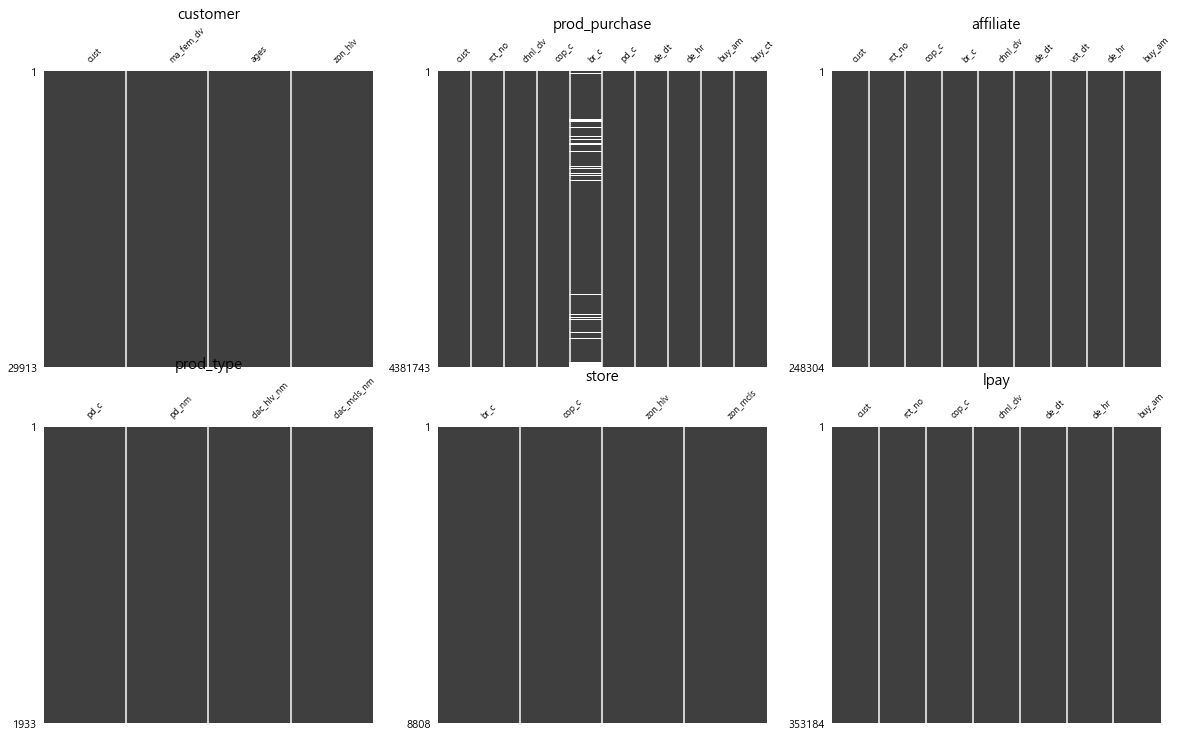

In [44]:
# missingno를 통해 키 찾고, 결측치 확인
import missingno as msno
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
for i in range(6):
    msno.matrix(datas[i][1], ax=ax[i//3][i%3], sparkline=False, filter="bottom", fontsize=9, width_ratios=.5)
    ax[i//3][i%3].set_title(datas[i][0], size=15)
plt.show()

# 2.DBMS Structure
---

In [45]:
for table, df in datas:
    print("=====",table,"=====")
    for col in df.columns:
        print(f"{col}\t {df[col].nunique()}")
    print(f"=== Total Length: {len(df)} ===")

===== customer =====
cust	 29913
ma_fem_dv	 2
ages	 6
zon_hlv	 17
=== Total Length: 29913 ===
===== prod_purchase =====
cust	 26917
rct_no	 1266589
chnl_dv	 2
cop_c	 6
br_c	 6755
pd_c	 1933
de_dt	 365
de_hr	 24
buy_am	 33791
buy_ct	 85
=== Total Length: 4381743 ===
===== affiliate =====
cust	 21769
rct_no	 248304
cop_c	 6
br_c	 2029
chnl_dv	 2
de_dt	 369
vst_dt	 366
de_hr	 24
buy_am	 9420
=== Total Length: 248304 ===
===== prod_type =====
pd_c	 1933
pd_nm	 1932
clac_hlv_nm	 60
clac_mcls_nm	 349
=== Total Length: 1933 ===
===== store =====
br_c	 8808
cop_c	 11
zon_hlv	 17
zon_mcls	 257
=== Total Length: 8808 ===
===== lpay =====
cust	 8906
rct_no	 353184
cop_c	 14
chnl_dv	 2
de_dt	 365
de_hr	 24
buy_am	 37755
=== Total Length: 353184 ===


**Find PK**
> pk의 기준은 df 길이와 column의 길이가 같은 것을 찾음 (고유값)

|No|Table Name   |PK columns |N unique |
|--|-------------|-----------|--------:|
|1 |customer     |cust       |29,913   |
|2 |prod_purchase|*NaN(Comb)*|4,381,943|
|3 |affiliate    |rct_no     |248,304  |
|4 |prod_type    |pd_c       |1,933    |
|5 |store        |br_c       |8,808    |
|6 |lpay         |rct_no     |353,184  |

- `prod_purchase`와 `affiliate`의 경우 트랜잭션을 나타내는 테이블
- 따라서 Combination Key의 형태로 나타났을 것으로 여겨짐

# 3.Combination KEY
---

In [46]:
purchase = datas[1][1]

In [47]:
print(f"Purchase : {len(purchase)}")
print(purchase.nunique())

Purchase : 4381743
cust         26917
rct_no     1266589
chnl_dv          2
cop_c            6
br_c          6755
pd_c          1933
de_dt          365
de_hr           24
buy_am       33791
buy_ct          85
dtype: int64


In [52]:
for col in purchase.columns:
    print(f"{col} : {4381743/purchase.nunique()[col]}")

cust : 162.78719768176245
rct_no : 3.459482910399506
chnl_dv : 2190871.5
cop_c : 730290.5
br_c : 648.6666173205033
pd_c : 2266.809622348681
de_dt : 12004.775342465753
de_hr : 182572.625
buy_am : 129.67189488325295
buy_ct : 51549.91764705882
